# Apple Stock 

## Model One

This is attempt one at creating a model that will predict the next days stock for Apple based on todays data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from copy import deepcopy as copy
import tensorflow as tf
from tensorflow import keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'   #TF2: to fix Jupyter down

In [2]:
# Load data
df = pd.read_csv("AAPL.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-12-31,12.281428,12.534286,12.191428,12.192857,10.583897,151885300
1,2009-01-02,12.268572,13.005714,12.165714,12.964286,11.253528,186503800
2,2009-01-05,13.310000,13.740000,13.244286,13.511429,11.728474,295402100
3,2009-01-06,13.707143,13.881429,13.198571,13.288571,11.535025,322327600
4,2009-01-07,13.115714,13.214286,12.894286,13.001429,11.285772,188262200
...,...,...,...,...,...,...,...
2764,2019-12-24,284.690002,284.890015,282.920013,284.269989,283.596924,12119700
2765,2019-12-26,284.820007,289.980011,284.700012,289.910004,289.223602,23280300
2766,2019-12-27,291.119995,293.970001,288.119995,289.799988,289.113831,36566500
2767,2019-12-30,289.459991,292.690002,285.220001,291.519989,290.829773,36028600


## Data Visualization & Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
Date         2769 non-null object
Open         2769 non-null float64
High         2769 non-null float64
Low          2769 non-null float64
Close        2769 non-null float64
Adj Close    2769 non-null float64
Volume       2769 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 151.6+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03
mean,102.150200,103.064599,101.220505,102.176330,95.990242,8.104350e+07
std,59.374488,59.883902,58.928612,59.445937,60.112070,6.146245e+07
min,11.341429,11.714286,11.171429,11.171429,9.697256,1.136200e+07
25%,55.377144,55.877144,54.605713,55.327145,48.026226,3.256000e+07
50%,94.639999,95.550003,93.629997,94.480003,86.021584,6.369020e+07
75%,141.600006,142.380005,140.869995,141.630005,135.558868,1.117956e+08
max,291.119995,293.970001,289.519989,293.649994,292.954712,4.702495e+08


In [6]:
# Check for any missing values
np.any(df.isnull())

False

In [7]:
T = df[['Close']].copy()
T

,Close
0,12.192857
1,12.964286
2,13.511429
3,13.288571
4,13.001429
...,...
2764,284.269989
2765,289.910004
2766,289.799988
2767,291.519989


In [8]:
X1 = df.iloc[:, :-3].copy()
X2 = df.iloc[:, -2:].copy()
X = pd.concat([X1, X2], axis=1)
X

,Date,Open,High,Low,Adj Close,Volume
0,2008-12-31,12.281428,12.534286,12.191428,10.583897,151885300
1,2009-01-02,12.268572,13.005714,12.165714,11.253528,186503800
2,2009-01-05,13.310000,13.740000,13.244286,11.728474,295402100
3,2009-01-06,13.707143,13.881429,13.198571,11.535025,322327600
4,2009-01-07,13.115714,13.214286,12.894286,11.285772,188262200
...,...,...,...,...,...,...
2764,2019-12-24,284.690002,284.890015,282.920013,283.596924,12119700
2765,2019-12-26,284.820007,289.980011,284.700012,289.223602,23280300
2766,2019-12-27,291.119995,293.970001,288.119995,289.113831,36566500
2767,2019-12-30,289.459991,292.690002,285.220001,290.829773,36028600


In [9]:
X['Date'] = X['Date'].str.replace("-","").astype(int)
X

,Date,Open,High,Low,Adj Close,Volume
0,20081231,12.281428,12.534286,12.191428,10.583897,151885300
1,20090102,12.268572,13.005714,12.165714,11.253528,186503800
2,20090105,13.310000,13.740000,13.244286,11.728474,295402100
3,20090106,13.707143,13.881429,13.198571,11.535025,322327600
4,20090107,13.115714,13.214286,12.894286,11.285772,188262200
...,...,...,...,...,...,...
2764,20191224,284.690002,284.890015,282.920013,283.596924,12119700
2765,20191226,284.820007,289.980011,284.700012,289.223602,23280300
2766,20191227,291.119995,293.970001,288.119995,289.113831,36566500
2767,20191230,289.459991,292.690002,285.220001,290.829773,36028600


In [10]:
X.shape

(2769, 6)

In [11]:
T.shape

(2769, 1)

In [12]:
Xnew = X.drop([2768])

In [13]:
Xnew

,Date,Open,High,Low,Adj Close,Volume
0,20081231,12.281428,12.534286,12.191428,10.583897,151885300
1,20090102,12.268572,13.005714,12.165714,11.253528,186503800
2,20090105,13.310000,13.740000,13.244286,11.728474,295402100
3,20090106,13.707143,13.881429,13.198571,11.535025,322327600
4,20090107,13.115714,13.214286,12.894286,11.285772,188262200
...,...,...,...,...,...,...
2763,20191223,280.529999,284.250000,280.369995,283.327576,24643000
2764,20191224,284.690002,284.890015,282.920013,283.596924,12119700
2765,20191226,284.820007,289.980011,284.700012,289.223602,23280300
2766,20191227,291.119995,293.970001,288.119995,289.113831,36566500


In [14]:
Tnew = T.drop([0])
Tnew

,Close
1,12.964286
2,13.511429
3,13.288571
4,13.001429
5,13.242857
...,...
2764,284.269989
2765,289.910004
2766,289.799988
2767,291.519989


In [15]:
Xnew.shape

(2768, 6)

In [16]:
Tnew.shape

(2768, 1)

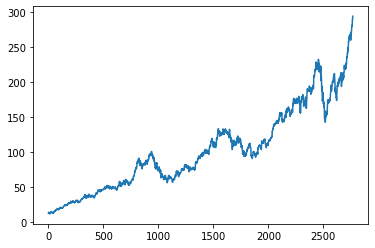

In [17]:
plt.plot(df.loc[:, 'Close'])

(array([431., 496., 497., 504., 219., 283., 186., 103.,  26.,  24.]),
 array([ 11.171429 ,  39.4192855,  67.667142 ,  95.9149985, 124.162855 ,
        152.4107115, 180.658568 , 208.9064245, 237.154281 , 265.4021375,
        293.649994 ]),
 <a list of 10 Patch objects>)

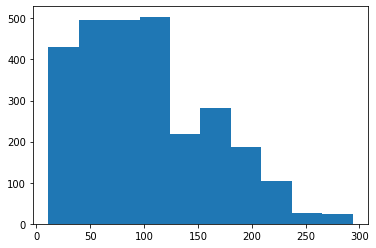

In [18]:
plt.hist(df.loc[:, 'Close'])

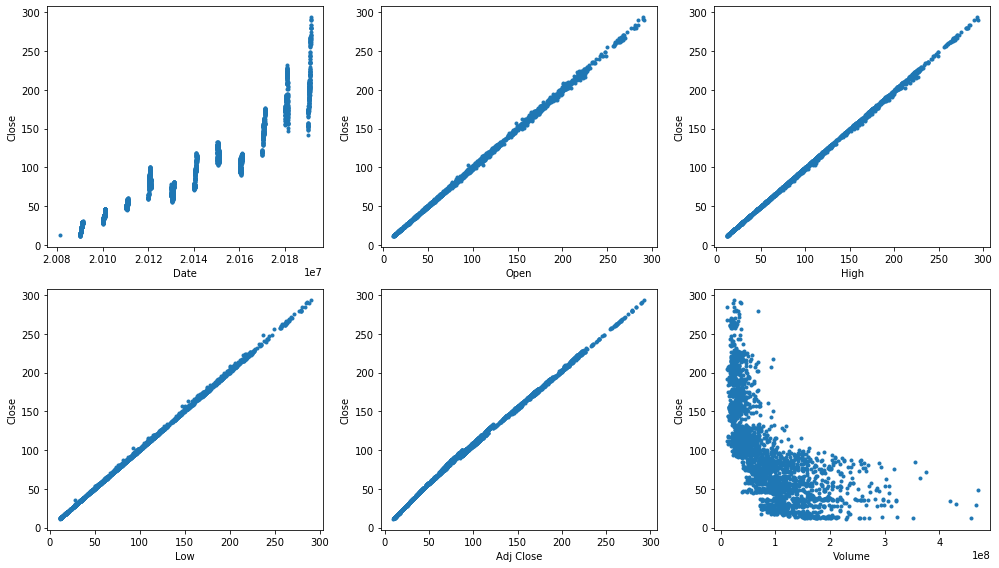

In [19]:
# Plot for each feature vs Class
fig = plt.figure(figsize=(14,8))
plt.clf()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Close')
fig.tight_layout()

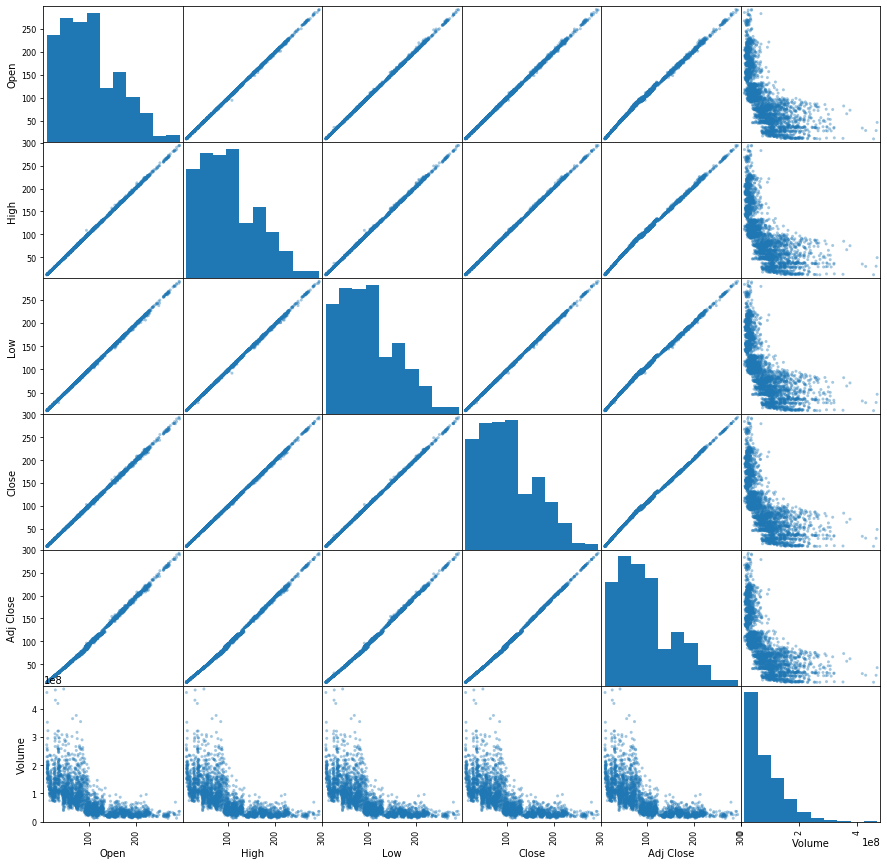

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.4, figsize=(15, 15));

## Data Partitioning

In [21]:
import partitionlib as ptl
import importlib
import partitionlib
importlib.reload(partitionlib);

In [22]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(copy(X.values), copy(T.values))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    
    return Xtrain, Xtest, Ttrain, Ttest

In [23]:
Xtrain, Xtest, Ttrain, Ttest = partition_data(Xnew, Tnew)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (2214, 6)
Train target shape: (2214, 1)
Test data shape: (554, 6)
Test target shape: (554, 1)


In [24]:
N, D = X.shape
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]
print("Number of total samples: {}".format(N))
print("Number of total features: {}".format(D))
print("Number of training samples: {}".format(Ntrain))
print("Number of testing samples: {}".format(Ntest))

Number of total samples: 2769
Number of total features: 6
Number of training samples: 2214
Number of testing samples: 554


### Standardize

In [25]:
#Before standardizing
pd.DataFrame(Xtrain).describe()

,0,1,2,3,4,5
count,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2.214000e+03
mean,2.014084e+07,102.105627,103.028521,101.188909,96.006772,8.050642e+07
std,3.180313e+04,59.352667,59.888086,58.914340,60.089959,6.103832e+07
min,2.008123e+07,11.341429,11.714286,11.171429,9.697256,1.136200e+07
25%,2.011092e+07,55.251787,55.559643,54.408214,47.699774,3.223008e+07
50%,2.014072e+07,94.994999,95.937859,94.110000,86.534695,6.328055e+07
75%,2.017041e+07,142.357502,143.212505,141.095002,136.066143,1.118661e+08
max,2.019123e+07,289.459991,292.690002,285.220001,290.829773,4.667775e+08


In [26]:
def standardize(X, mean, std):
    return (X-mean) / std

In [27]:
mean = np.mean(Xtrain, axis=0)
std = np.std(Xtrain, axis=0)

XtrainS = standardize(Xtrain, mean, std)
XtestS = standardize(Xtest, mean, std)

In [28]:
# After standardizing
pd.DataFrame(XtrainS).describe()

,0,1,2,3,4,5
count,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03
mean,-4.659099e-14,3.701025e-15,-2.995571e-16,-1.585967e-15,-9.345380e-16,-5.200096e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-1.874815e+00,-1.529581e+00,-1.525092e+00,-1.528284e+00,-1.436663e+00,-1.133059e+00
25%,-9.410637e-01,-7.895926e-01,-7.928055e-01,-7.942254e-01,-8.040929e-01,-7.910973e-01
50%,-3.868914e-03,-1.198301e-01,-1.184253e-01,-1.201831e-01,-1.576672e-01,-2.822778e-01
75%,9.298113e-01,6.783346e-01,6.711362e-01,6.775109e-01,6.668073e-01,5.138868e-01
max,1.584714e+00,3.157342e+00,3.167647e+00,3.124412e+00,3.242921e+00,6.329767e+00


In [29]:
def plot_result(Y, T, title=None):
    """
        Plots predicted and true labels.
        
        Args:
            Y (numpy.ndarray): Predicted labels
            
            T (numpy.ndarray): True labels
            
            title (str): Title for the plot
    """
    if len(T.shape) > 1:
        T = T.squeeze()
    # plot in sorted order
    sorted_i = np.argsort(T)

    plt.figure(figsize=[5,5])
    plt.plot(Y[sorted_i], 'b.', label="prediction")
    plt.plot(T[sorted_i], 'r-', label="target")
    plt.legend()
    plt.ylabel("Stock Price")
    plt.xlabel("Samples(days)")
    #plt.ylim([-1,4])
    plt.title(title)
    
    # accuracy
#    print("Acc: {} %".format(100 * np.sum(Y==T)/T.shape[0]))

# Model Creation

In [30]:
AppleModel = keras.Sequential([
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(1)
])

In [31]:
AppleModel.compile(loss="mse", optimizer='nadam')

In [60]:
history = AppleModel.fit(XtrainS, Ttrain, epochs = 500)

Train on 2214 samples
Epoch 1/500
2214/2214 [==============================] - 0s 102us/sample - loss: 3.8596
Epoch 2/500
2214/2214 [==============================] - 0s 91us/sample - loss: 3.9229
Epoch 3/500
2214/2214 [==============================] - 0s 87us/sample - loss: 3.9622
Epoch 4/500
2214/2214 [==============================] - 0s 84us/sample - loss: 3.9696
Epoch 5/500
2214/2214 [==============================] - 0s 86us/sample - loss: 3.8631
Epoch 6/500
2214/2214 [==============================] - 0s 85us/sample - loss: 3.9980
Epoch 7/500
2214/2214 [==============================] - 0s 86us/sample - loss: 4.0205
Epoch 8/500
2214/2214 [==============================] - 0s 85us/sample - loss: 4.0206
Epoch 9/500
2214/2214 [==============================] - 0s 84us/sample - loss: 3.9532
Epoch 10/500
2214/2214 [==============================] - 0s 86us/sample - loss: 4.1527
Epoch 11/500
2214/2214 [==============================] - 0s 115us/sample - loss: 4.4493
Epoch 12/500
2214

2214/2214 [==============================] - 0s 111us/sample - loss: 3.8621
Epoch 94/500
2214/2214 [==============================] - 0s 110us/sample - loss: 4.0201
Epoch 95/500
2214/2214 [==============================] - 0s 115us/sample - loss: 3.8322
Epoch 96/500
2214/2214 [==============================] - 0s 111us/sample - loss: 3.8794
Epoch 97/500
2214/2214 [==============================] - 0s 106us/sample - loss: 3.8788
Epoch 98/500
2214/2214 [==============================] - 0s 101us/sample - loss: 4.1896
Epoch 99/500
2214/2214 [==============================] - 0s 105us/sample - loss: 3.8886
Epoch 100/500
2214/2214 [==============================] - 0s 114us/sample - loss: 4.0497
Epoch 101/500
2214/2214 [==============================] - 0s 112us/sample - loss: 3.9925
Epoch 102/500
2214/2214 [==============================] - 0s 108us/sample - loss: 3.9306
Epoch 103/500
2214/2214 [==============================] - 0s 106us/sample - loss: 3.9512
Epoch 104/500
2214/2214 [=====

2214/2214 [==============================] - 0s 105us/sample - loss: 3.7037
Epoch 185/500
2214/2214 [==============================] - 0s 106us/sample - loss: 4.0694
Epoch 186/500
2214/2214 [==============================] - 0s 104us/sample - loss: 3.7712s - loss: 3.76
Epoch 187/500
2214/2214 [==============================] - 0s 110us/sample - loss: 4.1208
Epoch 188/500
2214/2214 [==============================] - 0s 102us/sample - loss: 3.9601
Epoch 189/500
2214/2214 [==============================] - 0s 100us/sample - loss: 3.8133s - loss: 3.7
Epoch 190/500
2214/2214 [==============================] - 0s 101us/sample - loss: 3.8457
Epoch 191/500
2214/2214 [==============================] - 0s 105us/sample - loss: 3.8270
Epoch 192/500
2214/2214 [==============================] - 0s 105us/sample - loss: 3.7981
Epoch 193/500
2214/2214 [==============================] - 0s 103us/sample - loss: 3.8570
Epoch 194/500
2214/2214 [==============================] - 0s 100us/sample - loss: 4.10

2214/2214 [==============================] - 0s 108us/sample - loss: 3.7697
Epoch 275/500
2214/2214 [==============================] - 0s 110us/sample - loss: 3.7145
Epoch 276/500
2214/2214 [==============================] - 0s 109us/sample - loss: 4.1069
Epoch 277/500
2214/2214 [==============================] - 0s 109us/sample - loss: 3.6659
Epoch 278/500
2214/2214 [==============================] - 0s 114us/sample - loss: 3.7795
Epoch 279/500
2214/2214 [==============================] - 0s 104us/sample - loss: 3.7390
Epoch 280/500
2214/2214 [==============================] - 0s 106us/sample - loss: 3.7123
Epoch 281/500
2214/2214 [==============================] - 0s 162us/sample - loss: 3.9067
Epoch 282/500
2214/2214 [==============================] - 0s 120us/sample - loss: 3.9322
Epoch 283/500
2214/2214 [==============================] - 0s 106us/sample - loss: 3.8984
Epoch 284/500
2214/2214 [==============================] - 0s 169us/sample - loss: 3.8667
Epoch 285/500
2214/2214 

2214/2214 [==============================] - 0s 110us/sample - loss: 3.7518
Epoch 366/500
2214/2214 [==============================] - 0s 124us/sample - loss: 3.9150
Epoch 367/500
2214/2214 [==============================] - 0s 155us/sample - loss: 3.7767
Epoch 368/500
2214/2214 [==============================] - 0s 132us/sample - loss: 3.8091
Epoch 369/500
2214/2214 [==============================] - 0s 114us/sample - loss: 3.6226
Epoch 370/500
2214/2214 [==============================] - 0s 111us/sample - loss: 3.7241
Epoch 371/500
2214/2214 [==============================] - 0s 109us/sample - loss: 3.7182
Epoch 372/500
2214/2214 [==============================] - 0s 115us/sample - loss: 3.8289
Epoch 373/500
2214/2214 [==============================] - 0s 108us/sample - loss: 3.7311
Epoch 374/500
2214/2214 [==============================] - 0s 127us/sample - loss: 3.8878
Epoch 375/500
2214/2214 [==============================] - 0s 156us/sample - loss: 3.7158
Epoch 376/500
2214/2214 

2214/2214 [==============================] - 0s 97us/sample - loss: 3.7237
Epoch 457/500
2214/2214 [==============================] - 0s 96us/sample - loss: 3.7144
Epoch 458/500
2214/2214 [==============================] - 0s 98us/sample - loss: 3.7279
Epoch 459/500
2214/2214 [==============================] - 0s 95us/sample - loss: 3.7927
Epoch 460/500
2214/2214 [==============================] - 0s 112us/sample - loss: 3.9474
Epoch 461/500
2214/2214 [==============================] - 0s 111us/sample - loss: 3.7826
Epoch 462/500
2214/2214 [==============================] - 0s 111us/sample - loss: 3.6736
Epoch 463/500
2214/2214 [==============================] - 0s 98us/sample - loss: 3.8477
Epoch 464/500
2214/2214 [==============================] - 0s 96us/sample - loss: 3.6781
Epoch 465/500
2214/2214 [==============================] - 0s 95us/sample - loss: 3.9518
Epoch 466/500
2214/2214 [==============================] - 0s 97us/sample - loss: 3.8661
Epoch 467/500
2214/2214 [=======

In [33]:
AppleModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  700       
_________________________________________________________________
dense_1 (Dense)              multiple                  10100     
_________________________________________________________________
dense_2 (Dense)              multiple                  10100     
_________________________________________________________________
dense_3 (Dense)              multiple                  10100     
_________________________________________________________________
dense_4 (Dense)              multiple                  10100     
_________________________________________________________________
dense_5 (Dense)              multiple                  101       
Total params: 41,201
Trainable params: 41,201
Non-trainable params: 0
____________________________________________________

## Testing and Validation

In [61]:
error= AppleModel.evaluate(XtestS, Ttest)

554/554 [==============================] - 0s 58us/sample - loss: 3.9422


In [49]:
y = AppleModel.predict(XtestS)
y1 = np.argmax(y, axis=1)

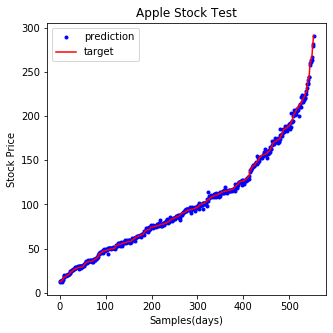

In [50]:
plot_result(y, Ttest, title="Apple Stock Test")

Text(0, 0.5, 'Loss')

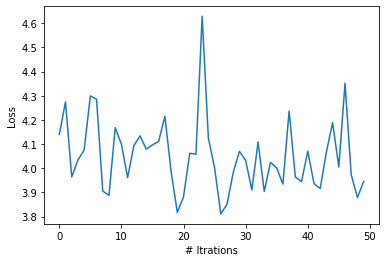

In [51]:
plt.plot(history.history['loss'])
plt.xlabel("# Itrations")
plt.ylabel("Loss")

#### Regression Measures

In [52]:
MAE = np.mean(np.abs(Ttest-y))
print('MAE = ', MAE)
MSE = np.mean((Ttest-y)**2)
print('MSE = ', MSE)
MAPE = 100 * np.mean(np.abs((Ttest-y)/Ttest))
print('MAPE = ', MAPE)
MPE = 100 * np.mean((Ttest-y)/Ttest)
print('MPE = ', MPE)
R2 = 1 - np.sum((y-Ttest)**2) / np.sum((Ttest - np.mean(Ttest))**2)
print('R2', R2)

MAE =  1.332573091726145
MSE =  3.5447345562901433
MAPE =  1.6438917304821818
MPE =  -0.5434357397009416
R2 0.9989870696250421


In [53]:
# This section of code, determines how many times the model predicts more or less than the actual closing price.

less = 0
more = 0

for i in range(len(y)):
    if(y[i] < Ttest[i]):   # Prediction of model was less than the actual closing value
        less = less + 1
    else:    # Prediction of model was greater than actual closing value
        more = more + 1

In [54]:
less

237

In [55]:
more

317

In [56]:

fivePercentOff = 0
tenPercentOff = 0
belowFivePercent = 0

for i in range(len(y)):
    if(abs(y[i] - Ttest[i]) > Ttest[i]*.1):
        fivePercentOff += 1
    elif(abs(y[i] - Ttest[i]) > Ttest[i]*.05):
        tenPercentOff += 1
    else:
        belowFivePercent += 1

In [57]:
fivePercentOff

1

In [58]:
tenPercentOff

21

In [59]:
belowFivePercent

532